# MarketPlace Property values check

This is document cheks the marketPlace using the python library Pandas.

*One question about the API: is there a call I could use to see all the
"values" that are behind a given dynamic property? Example: all the
terms/words that are used to populate "activity" or "material" for all
the items in the MP (or by class). I know that for "activity" we are
supposed to have only terms coming from TADIRAH and Nemo, but this is
exactly what I would like to check.*

Main results are here: https://docs.google.com/spreadsheets/d/1dVoXtS6WttzNh2EpiK39exxZR_7zXPpnPtaz-wQPekk/edit#gid=944819204


## Preamble

In [1]:
import ast
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bokeh.io import output_notebook, show
from bokeh.plotting import figure

# for db
import sqlalchemy as db
from sqlalchemy import *

## Get the the Market Place properties (using the API)

The SSHOC Market Place API entry: 

https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/property-types

has been used to extract the to get the list of dynamic properties in the SSHOC Market Place. 

In [2]:
x = ('1','2')
df_dynammic_properties = pd.DataFrame()
for var in x:
    url = "https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/property-types?page="+str(var)+"&perpage=20"
    df_tool_par=pd.read_json(url, orient='columns')
    df_dynammic_properties=df_dynammic_properties.append(df_tool_par, ignore_index=True)
    #print("url: "+ url + ":",var)
#df_dynammic_properties.head()

There are 28  property types in MP dataset. The following table shows 10 records.

In [3]:
#properties are returned as JSON object, create a dataframe
pd.reset_option('max_colwidth')
df_dypro_flat = pd.json_normalize(df_dynammic_properties['propertyTypes'])
df_dypro_flat.sort_values('label').head(10)

,code,label,type,ord,allowedVocabularies
1,activity,Activity,concept,2,"[{'code': 'nemo-activity-type', 'label': 'NeMO..."
29,authentication,Authentication,string,30,[]
18,conference,Conference,string,19,[]
14,cover-image,Cover Image,url,15,[]
25,doi,DOI,string,26,[]
20,issue,Issue,string,21,[]
17,journal,Journal,string,18,[]
5,keyword,Keyword,string,6,[]
0,language,Language,concept,1,"[{'code': 'iso-639-3', 'label': 'ISO 639-3', '..."
9,license-type,License Type,string,10,[]


#### Property Types with vocabularies

In [4]:
df_prop_data = pd.json_normalize(data = df_dynammic_properties['propertyTypes'], record_path='allowedVocabularies', meta_prefix='activity_', meta=['label'])
df_prop_data.head(10)

,code,label,accessibleAt,activity_label
0,iso-639-3,ISO 639-3,None,Language
1,iso-639-3-v2,ISO 639-3 Sprachcodes,None,Language
2,nemo-activity-type,NeMO Concept Scheme,None,Activity
3,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activit...,None,Activity
4,tadirah-research-technique,TaDiRAH Research Technique,None,Technique
5,iana-mime-type,IANA mime/type,None,Object format
6,publication-type,The Bibliographic Ontology Concept Scheme,None,Publication type


## Get the the Market Place properties by extracting values from item descriptions

## Tools and services

In [20]:
x = pd.Series(range(2,70))
url = 'https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/tools-services?page=1&perpage=20'
df_tool_all = pd.read_json(url, orient='columns')
for var in x:
    url = "https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/tools-services?page="+str(var)+"&perpage=20"
    df_tool_par=pd.read_json(url, orient='columns')
    df_tool_all=df_tool_all.append(df_tool_par, ignore_index=True)
   # print("url: "+ url + ":",var)
df_tool_all.index

RangeIndex(start=0, stop=1369, step=1)

In [73]:
pd.set_option('max_colwidth', 200)
df_prop_data = pd.json_normalize(data=df_tool_all['tools'], record_path='properties', meta=['label'])
df_prop_data.head()

,id,value,concept,type.code,type.label,type.type,type.ord,type.allowedVocabularies,concept.code,concept.vocabulary.code,concept.vocabulary.label,concept.vocabulary.accessibleAt,concept.label,concept.notation,concept.definition,concept.uri,label
0,96464,Run in Browser,NaN,web-usable,Web Usable,string,11,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
1,96465,Visualization,NaN,keyword,Keyword,string,6,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
2,96466,Analysis,NaN,keyword,Keyword,string,6,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
3,96467,Analysis,NaN,tadirah-goals,Tadirah Goals,string,7,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
4,96468,Visualization,NaN,tadirah-methods,Tadirah Methods,string,13,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit


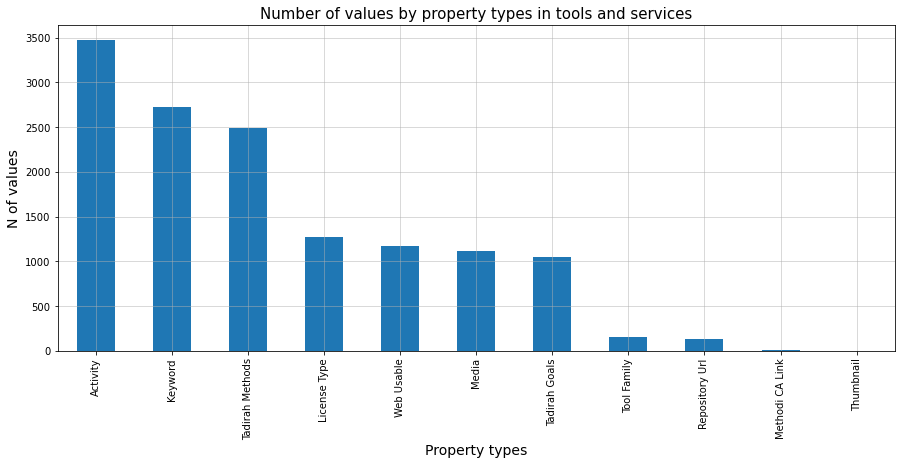

In [22]:
df_temp_type_label = df_prop_data['type.label'].value_counts()
fig, ax = plt.subplots()
df_temp_type_label.plot(kind='bar', figsize=(15,6), x='licences', y='tools',)
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of values by property types in tools and services", fontsize=15)
ax.set_xlabel('Property types', fontsize=14)
ax.set_ylabel('N of values', fontsize=14);
plt.show()

### Publications

In [23]:
px = pd.Series(range(1,88))
#url = 'https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/publications?page=1&perpage=20'
df_pub_all = pd.DataFrame()
for var in px:
    url = "https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/publications?page="+str(var)+"&perpage=20"
    df_pub_par=pd.read_json(url, orient='columns')
    df_pub_all=df_pub_all.append(df_pub_par, ignore_index=True)
   # print("url: "+ url + ":",var)
df_pub_all.index

RangeIndex(start=0, stop=1721, step=1)

In [74]:
#df_pub_all.head()

In [75]:
df_prop__pub_data = pd.json_normalize(data=df_pub_all['publications'], record_path='properties', meta=['label'])
df_prop__pub_data.tail()

,id,value,concept,type.code,type.label,type.type,type.ord,type.allowedVocabularies,label
2700,110262,2016,None,year,Year,int,23,[],You Better Monetize! Monetization Strategies in Publishing and Disseminating Digital Scholarly ditions.
2701,109185,2017,None,year,Year,int,23,[],Your Own Personal Matrix - Generationally Mediated Realities and the Digital Culture of Choice.
2702,108148,2020,None,year,Year,int,23,[],Zemsky Educational Establishments - Development of the Database.
2703,108813,239,None,pages,Pages,string,22,[],"ZX Spectrum, or Decentering Digital Media Platform Studies approach as a tool to investigate the cultural differences through computing systems in their interactions with creativity and expression."
2704,108814,2018,None,year,Year,int,23,[],"ZX Spectrum, or Decentering Digital Media Platform Studies approach as a tool to investigate the cultural differences through computing systems in their interactions with creativity and expression."


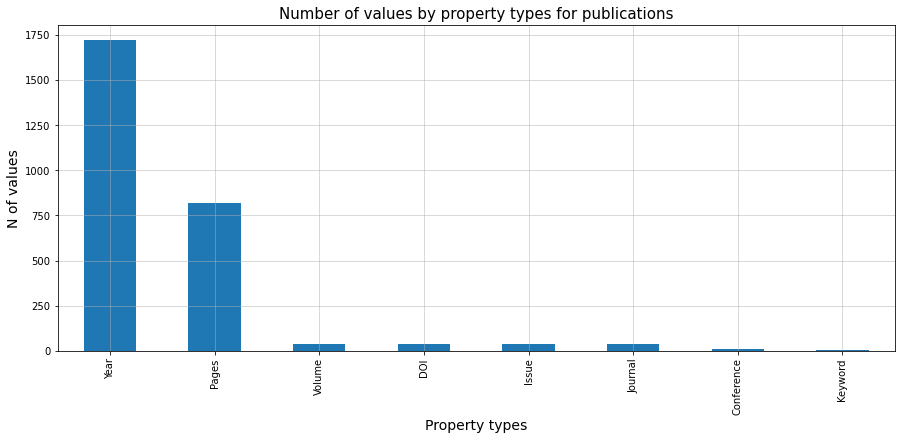

In [26]:
df_temp_pub_type_label = df_prop__pub_data['type.label'].value_counts()
fig, ax = plt.subplots()
df_temp_pub_type_label.plot(kind='bar', figsize=(15,6), x='licences', y='tools',)
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of values by property types for publications", fontsize=15)
ax.set_xlabel('Property types', fontsize=14)
ax.set_ylabel('N of values', fontsize=14);
plt.show()

### Training Materials

In [27]:
#https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/training-materials

tmx = pd.Series(range(1,6))
#url = 'https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/publications?page=1&perpage=20'
df_tm_all = pd.DataFrame()
for var in tmx:
    url = "https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/training-materials?page="+str(var)+"&perpage=20"
    df_tm_par=pd.read_json(url, orient='columns')
    df_tm_all=df_tm_all.append(df_tm_par, ignore_index=True)
   # print("url: "+ url + ":",var)
df_tm_all.index

RangeIndex(start=0, stop=82, step=1)

In [28]:
df_prop__tm_data = pd.json_normalize(data=df_tm_all['trainingMaterials'], record_path='properties', meta=['label'])
df_prop__tm_data.head()

,id,value,concept,type.code,type.label,type.type,type.ord,type.allowedVocabularies,concept.code,concept.vocabulary.code,concept.vocabulary.label,concept.vocabulary.accessibleAt,concept.label,concept.notation,concept.definition,concept.uri,label
0,32602,https://github.com/programminghistorian/jekyll/blob/gh-pages/en/lessons/analyzing-documents-with-tfidf.md,NaN,repository-url,Repository Url,url,9,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Analyzing Documents with TF-IDF
1,32603,https://programminghistorian.org/gallery/analyzing-documents-with-tfidf.png,NaN,media,Media,url,16,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Analyzing Documents with TF-IDF
2,32604,None,NaN,language,Language,concept,1,"[{'code': 'iso-639-3', 'label': 'ISO 639-3', 'accessibleAt': None}, {'code': 'iso-639-3-v2', 'label': 'ISO 639-3 Sprachcodes', 'accessibleAt': None}]",eng,iso-639-3,ISO 639-3,NaN,eng,English,English (English),http://iso639-3.sil.org/code/eng,Analyzing Documents with TF-IDF
3,32439,https://programminghistorian.org/gallery/intro-to-twitterbots.png,NaN,media,Media,url,16,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An Introduction to Twitterbots with Tracery\n
4,32440,https://github.com/programminghistorian/jekyll/blob/gh-pages/en/lessons/intro-to-twitterbots.md,NaN,repository-url,Repository Url,url,9,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An Introduction to Twitterbots with Tracery\n


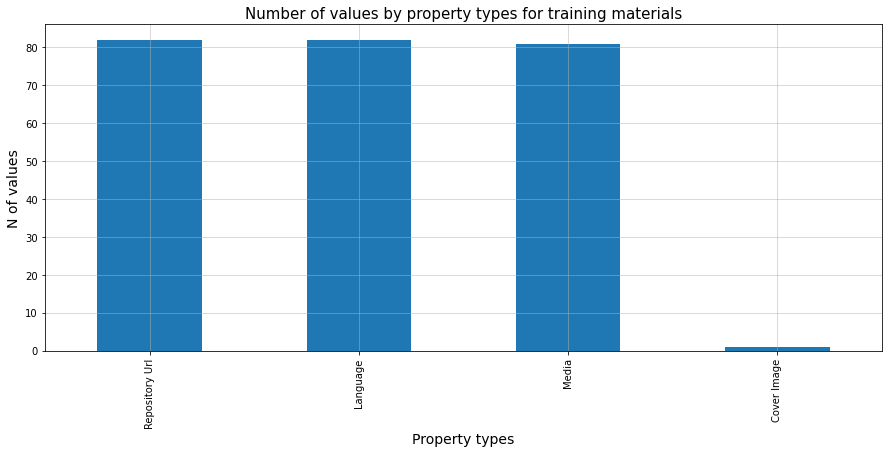

In [29]:
df_temp_tm_type_label = df_prop__tm_data['type.label'].value_counts()
fig, ax = plt.subplots()
df_temp_tm_type_label.plot(kind='bar', figsize=(15,6), x='licences', y='tools',)
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of values by property types for training materials", fontsize=15)
ax.set_xlabel('Property types', fontsize=14)
ax.set_ylabel('N of values', fontsize=14);
plt.show()

### Workflows

In [30]:
wfx = pd.Series(range(1,3))
#url = 'https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/publications?page=1&perpage=20'
df_wf_all = pd.DataFrame()
for var in wfx:
    wurl = "https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/workflows?page="+str(var)+"&perpage=20"
    df_wf_par=pd.read_json(wurl, orient='columns')
    df_wf_all=df_wf_all.append(df_wf_par, ignore_index=True)
   # print("url: "+ url + ":",var)
df_wf_all.index

RangeIndex(start=0, stop=28, step=1)

In [31]:
df_prop__wf_data = pd.json_normalize(data=df_wf_all['workflows'], record_path='properties', meta=['label'])
df_prop__wf_data.head()

,id,value,concept,type.code,type.label,type.type,type.ord,type.allowedVocabularies,concept.code,concept.vocabulary.code,concept.vocabulary.label,concept.vocabulary.accessibleAt,concept.label,concept.notation,concept.definition,concept.uri,label
0,16498,https://raw.githubusercontent.com/ParthenosWP4/SSK/master/scenarios/SSK_sc_RUBRICA_technical.xml,NaN,repository-url,Repository Url,url,9,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aggregate different datasets using RUBRICA
1,16499,https://upload.wikimedia.org/wikipedia/commons/5/54/Cistercian_monks_at_work_-_UL_Cambridge_Ms_Mm.5.31.jpg,NaN,media,Media,url,16,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aggregate different datasets using RUBRICA
2,16500,None,NaN,language,Language,concept,1,"[{'code': 'iso-639-3', 'label': 'ISO 639-3', 'accessibleAt': None}, {'code': 'iso-639-3-v2', 'label': 'ISO 639-3 Sprachcodes', 'accessibleAt': None}]",eng,iso-639-3,ISO 639-3,NaN,eng,English,English (English),http://iso639-3.sil.org/code/eng,Aggregate different datasets using RUBRICA
3,16494,None,NaN,language,Language,concept,1,"[{'code': 'iso-639-3', 'label': 'ISO 639-3', 'accessibleAt': None}, {'code': 'iso-639-3-v2', 'label': 'ISO 639-3 Sprachcodes', 'accessibleAt': None}]",eng,iso-639-3,ISO 639-3,NaN,eng,English,English (English),http://iso639-3.sil.org/code/eng,Aggregate together different datasets to obtain a single reference resource
4,16495,https://raw.githubusercontent.com/ParthenosWP4/SSK/master/scenarios/SSK_sc_RUBRICA.xml,NaN,repository-url,Repository Url,url,9,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aggregate together different datasets to obtain a single reference resource


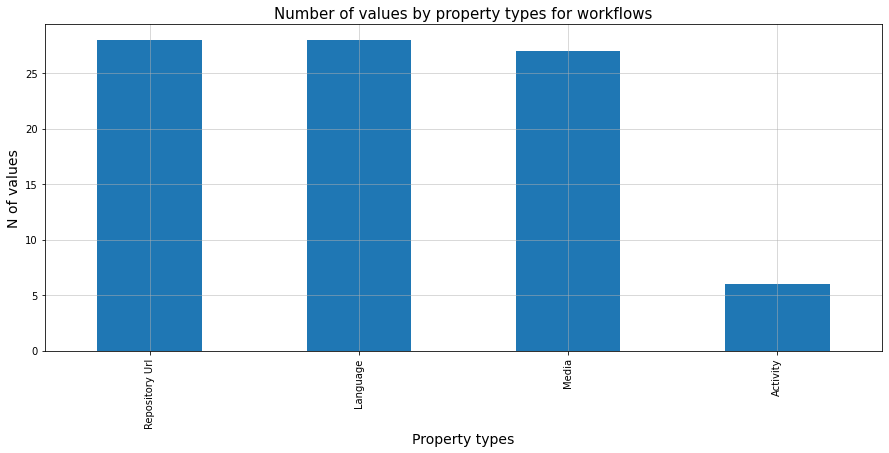

In [32]:
df_temp_wf_type_label = df_prop__wf_data['type.label'].value_counts()
fig, ax = plt.subplots()
df_temp_wf_type_label.plot(kind='bar', figsize=(15,6), x='licences', y='tools',)
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of values by property types for workflows", fontsize=15)
ax.set_xlabel('Property types', fontsize=14)
ax.set_ylabel('N of values', fontsize=14);
plt.show()

### Join dataframes

In [35]:
df_list=[df_prop_data, df_prop__pub_data, df_prop__tm_data, df_prop__wf_data]
df_all_data=pd.concat(df_list)
df_all_data.head()

,id,value,concept,type.code,type.label,type.type,type.ord,type.allowedVocabularies,concept.code,concept.vocabulary.code,concept.vocabulary.label,concept.vocabulary.accessibleAt,concept.label,concept.notation,concept.definition,concept.uri,label
0,96464,Run in Browser,NaN,web-usable,Web Usable,string,11,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
1,96465,Visualization,NaN,keyword,Keyword,string,6,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
2,96466,Analysis,NaN,keyword,Keyword,string,6,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
3,96467,Analysis,NaN,tadirah-goals,Tadirah Goals,string,7,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
4,96468,Visualization,NaN,tadirah-methods,Tadirah Methods,string,13,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit


In [39]:
tad_prop=df_all_data[df_all_data['concept.vocabulary.label'] == 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities']
tad_prop.head()

,id,value,concept,type.code,type.label,type.type,type.ord,type.allowedVocabularies,concept.code,concept.vocabulary.code,concept.vocabulary.label,concept.vocabulary.accessibleAt,concept.label,concept.notation,concept.definition,concept.uri,label
5,96469,None,NaN,activity,Activity,concept,2,"[{'code': 'nemo-activity-type', 'label': 'NeMO Concept Scheme', 'accessibleAt': None}, {'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities', ...",32,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities,NaN,Visualization,,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/32,140kit
6,96470,None,NaN,activity,Activity,concept,2,"[{'code': 'nemo-activity-type', 'label': 'NeMO Concept Scheme', 'accessibleAt': None}, {'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities', ...",25,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities,NaN,Analysis,,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/25,140kit
9,96473,None,NaN,activity,Activity,concept,2,"[{'code': 'nemo-activity-type', 'label': 'NeMO Concept Scheme', 'accessibleAt': None}, {'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities', ...",11,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities,NaN,Gathering,,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/11,140kit
10,96474,None,NaN,activity,Activity,concept,2,"[{'code': 'nemo-activity-type', 'label': 'NeMO Concept Scheme', 'accessibleAt': None}, {'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities', ...",7,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities,NaN,Capture,,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/7,140kit
16,95944,None,NaN,activity,Activity,concept,2,"[{'code': 'nemo-activity-type', 'label': 'NeMO Concept Scheme', 'accessibleAt': None}, {'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities', ...",17,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities,NaN,Programming,,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/17,4th Dimension


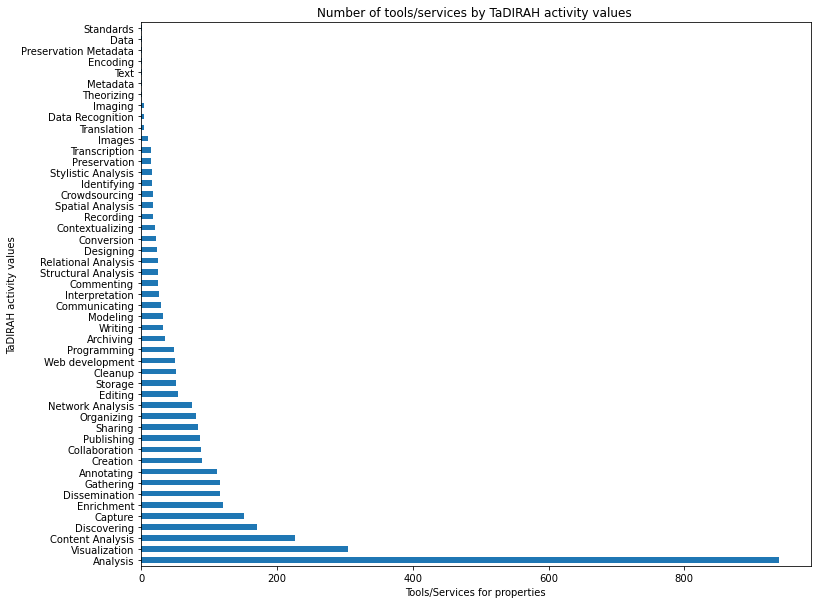

In [38]:
df_temp_tad_label = tad_prop['concept.label'].value_counts()
fig, ax = plt.subplots()
df_temp_tad_label.plot.barh(figsize=(12,10), ax=ax)
ax.set_title('Number of tools/services by TaDIRAH activity values ')
ax.set_xlabel('Tools/Services for properties')
ax.set_ylabel('TaDIRAH activity values');

In [41]:
#printing in a file all TaDiRAH activities in the MP
act_prop_temp=tad_prop[['type.label', 'value', 'type.code', 'type.type', 'concept.label', 'concept.uri', 'concept.vocabulary.code', 'concept.vocabulary.label']]
act_prop=act_prop_temp.drop_duplicates()
act_prop.index

Int64Index([   5,    6,    9,   10,   16,   21,   25,   34,   40,   59,   61,
              75,   88,   89,  118,  124,  132,  143,  146,  192,  228,  331,
             340,  348,  439,  459,  462,  464,  476,  502,  536,  561,  622,
             635,  663,  766,  767, 1190, 1193, 1282, 1285, 3136, 4160,   18,
              19,   20,   21,   25,   26],
           dtype='int64')

See: https://docs.google.com/spreadsheets/d/1dVoXtS6WttzNh2EpiK39exxZR_7zXPpnPtaz-wQPekk/edit#gid=944819204 for the  list of properties

In [43]:
act_prop.sort_values('concept.label').to_csv(path_or_buf='actualtadirahvalues.csv')

In [85]:
df_p_d=tad_prop[tad_prop.duplicated(['label', 'concept.label'], keep=False)].sort_values('label')
df_p_d.tail(2)

,id,value,concept,type.code,type.label,type.type,type.ord,type.allowedVocabularies,concept.code,concept.vocabulary.code,concept.vocabulary.label,concept.vocabulary.accessibleAt,concept.label,concept.notation,concept.definition,concept.uri,label
13217,100311,None,NaN,activity,Activity,concept,2,"[{'code': 'nemo-activity-type', 'label': 'NeMO Concept Scheme', 'accessibleAt': None}, {'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities', ...",25,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities,NaN,Analysis,,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/25,wordsimilarity (Word 2 Word)
13215,100309,None,NaN,activity,Activity,concept,2,"[{'code': 'nemo-activity-type', 'label': 'NeMO Concept Scheme', 'accessibleAt': None}, {'code': 'tadirah-activity', 'label': 'TaDiRAH - Taxonomy of Digital Research Activities in the Humanities', ...",25,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities,NaN,Analysis,,,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/25,wordsimilarity (Word 2 Word)


### Finding and printing in a file item labels having duplicated TaDiRAH activities

In [86]:
act_prop_temp_dupl=df_p_d[['label', 'concept.label', 'concept.uri','type.label', 'value', 'type.code', 'type.type', 'concept.vocabulary.code', 'concept.vocabulary.label']]
act_prop_temp_dupl.head()

,label,concept.label,concept.uri,type.label,value,type.code,type.type,concept.vocabulary.code,concept.vocabulary.label
35,80legs,Analysis,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/25,Activity,None,activity,concept,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities
36,80legs,Analysis,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/25,Activity,None,activity,concept,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities
66,ABFREQ,Analysis,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/25,Activity,None,activity,concept,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities
68,ABFREQ,Analysis,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/25,Activity,None,activity,concept,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities
448,ANTHROPAC,Analysis,https://sshoc.poolparty.biz/Vocabularies/tadirah-activities/25,Activity,None,activity,concept,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities


In [87]:
act_prop_temp_dupl.sort_values('label').to_csv(path_or_buf='/Users/cesare/Documents/sshoc/wp7/duplicatetadirahvalues.csv')

In [76]:
#printing in a file all TaDiRAH Goals and TaDiRAH Methods values
tad_gm_prop=df_all_data[(df_all_data['type.code'] == 'tadirah-goals') | (df_all_data['type.code'] == 'tadirah-methods')]
tad_gm_prop.head()

,id,value,concept,type.code,type.label,type.type,type.ord,type.allowedVocabularies,concept.code,concept.vocabulary.code,concept.vocabulary.label,concept.vocabulary.accessibleAt,concept.label,concept.notation,concept.definition,concept.uri,label
3,96467,Analysis,NaN,tadirah-goals,Tadirah Goals,string,7,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
4,96468,Visualization,NaN,tadirah-methods,Tadirah Methods,string,13,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
11,96475,Capture,NaN,tadirah-goals,Tadirah Goals,string,7,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
12,96476,Gathering,NaN,tadirah-methods,Tadirah Methods,string,13,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140kit
17,95945,Programming,NaN,tadirah-methods,Tadirah Methods,string,13,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4th Dimension


In [52]:
act_prop_temp=tad_gm_prop[['type.label', 'type.code', 'value', 'type.type', 'concept.uri']]
act_prop_temp=act_prop_temp.drop_duplicates()
act_prop_temp.head()

,type.label,type.code,value,type.type,concept.uri
3,Tadirah Goals,tadirah-goals,Analysis,string,NaN
4,Tadirah Methods,tadirah-methods,Visualization,string,NaN
11,Tadirah Goals,tadirah-goals,Capture,string,NaN
12,Tadirah Methods,tadirah-methods,Gathering,string,NaN
17,Tadirah Methods,tadirah-methods,Programming,string,NaN


In [53]:
act_prop_temp.sort_values('value').to_csv(path_or_buf='fvactualtadirahgoalsmethodsvalues.csv')